<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Intensidad puntual </font>
</div>

Vamos a estudiar qué ocurre cuando se tiene solo la intensidad en un punto en lugar de franjas

In [1]:
import numpy as np
from py_pol.jones_matrix import Jones_matrix, Jones_vector, np, degrees
import matplotlib.pyplot as plt

# Figura

Fase respecto a acimut y retardancia

(6, 181, 10)


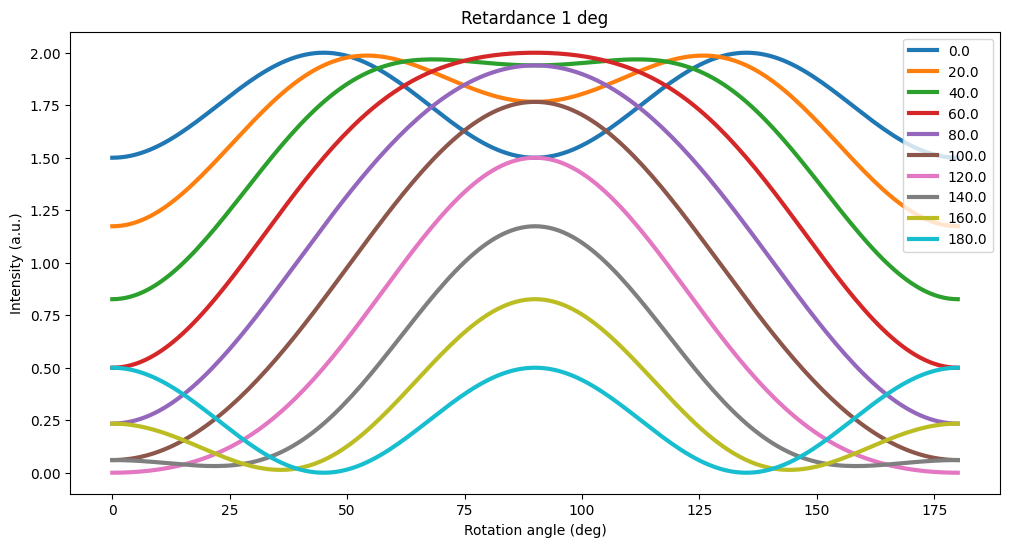

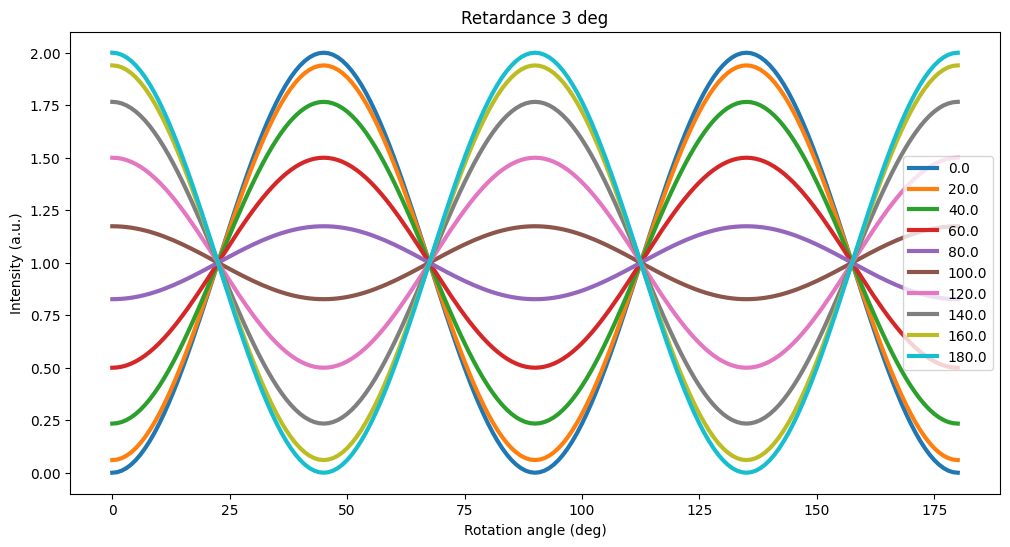

In [3]:
angulos = np.linspace(0, 180*degrees, 181)
ret = np.linspace(30*degrees, 180*degrees, 6)
fase = np.linspace(0, 180*degrees, 10)
Angles, Ret, Fase = np.meshgrid(angulos, ret, fase)
legend = np.round(fase / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=Ret, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E
I = Efinal.parameters.intensity()
print(I.shape)

for indR, R in enumerate(ret):
    plt.figure(figsize=(12,6))
    for indF, F in enumerate(fase):
        # ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[indR, :, indF], linewidth=3) # , linestyle=ls
    plt.xlabel("Rotation angle (deg)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)
    plt.title("Retardance {:.0f} deg".format(R))


Es necesario tener un control en la fase para poder medir lo que queremos medir. En ese caso, esa variación en la fase es equivalente a la inclinación de los espejos para tener franjas.